In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np

In [2]:
from keras.datasets import mnist
(TrainImages, TrainLabels), (TestImages, TestLabels) = mnist.load_data()

In [3]:
TrainImages.shape

(60000, 28, 28)

In [4]:
TrainImages.max()

255

In [5]:
TrainLabels.shape

(60000,)

In [6]:
TrainLabels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
TestImages.shape

(10000, 28, 28)

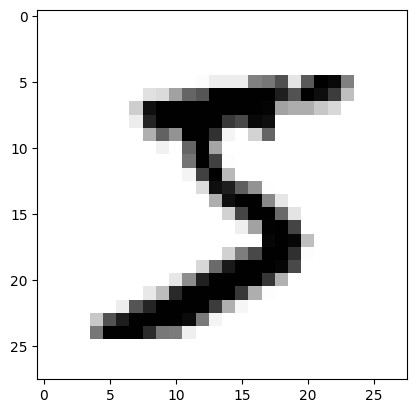

In [8]:
Digit = TrainImages[0]
plt.imshow(Digit, cmap = plt.cm.binary)
plt.show()

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential([
	layers.Dense(512, activation = 'relu', input_shape = (28*28, )),
	layers.Dense(256, activation = 'relu',),
	layers.Dense(128, activation = 'relu',),
	layers.Dense(64, activation = 'relu',),
	layers.Dense(32, activation = 'relu',),

	layers.Dense(10, activation = 'softmax',), # 숫자가 10개이므로 저렇게 함 / softmax 는 좀 공부하기로
])

In [11]:
model.compile(
	optimizer = 'rmsprop',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

In [12]:
TrainImages.shape

(60000, 28, 28)

In [13]:
TrainImages = TrainImages.reshape((60000, 28 * 28))

In [14]:
TrainImages.shape

(60000, 784)

In [15]:
TrainImages = TrainImages.astype('float32') / 255

In [16]:
TrainImages

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
TestImages = TestImages.reshape((10000, 28 * 28))
TestImages = TestImages.astype('float32') / 255

In [18]:
from keras.utils import to_categorical

In [19]:
TrainLabels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
TrainLabels = to_categorical(TrainLabels)
TrainLabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
TestLabels = to_categorical(TestLabels)
TestLabels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
model.fit(TrainImages, TrainLabels, epochs = 10, batch_size = 128)
# batch_size : 128 장 씩 나눠서 학습하겠다

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3030 - accuracy: 0.9076
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1032 - accuracy: 0.9691
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0718 - accuracy: 0.9787
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0530 - accuracy: 0.9841
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0407 - accuracy: 0.9879
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0342 - accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0294 - accuracy: 0.9918
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0252 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0218 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0197 - accuracy:

In [23]:
TestLoss, TestAccuracy = model.evaluate(TestImages, TestLabels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9797


In [24]:
TestAccuracy

0.9797000288963318